In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, roc_curve, auc


# Exemplo com base de dados de Cancer de mama

Usaremos o conjunto de dados sobre câncer de mama do scikit-learn:

## Step 1: Carregar e separar base

In [10]:
# Carregar e separar base de dados original (20% treinamento)
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Step 2: Train AdaBoost and Random Forest Classifiers

Treine os dois modelos nos dados de treinamento:

In [11]:
# Inicializar os classificadores
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Ajustar modelos
adaboost.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

/home/heart/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


RandomForestClassifier(random_state=42)

## Step 3: Avaliar modelos
Use a precisão como a principal métrica para comparação e também gere curvas ROC para visualizar seu desempenho:

In [12]:
# Predições
y_pred_adaboost = adaboost.predict(X_test)
y_pred_rf = random_forest.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"AdaBoost Accuracy: {accuracy_adaboost:.2f}")
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

AdaBoost Accuracy: 0.97
Random Forest Accuracy: 0.96


## Plotar as curvas ROC
Vamos plotar as curvas ROC para visualizar o desempenho de ambos os modelos:

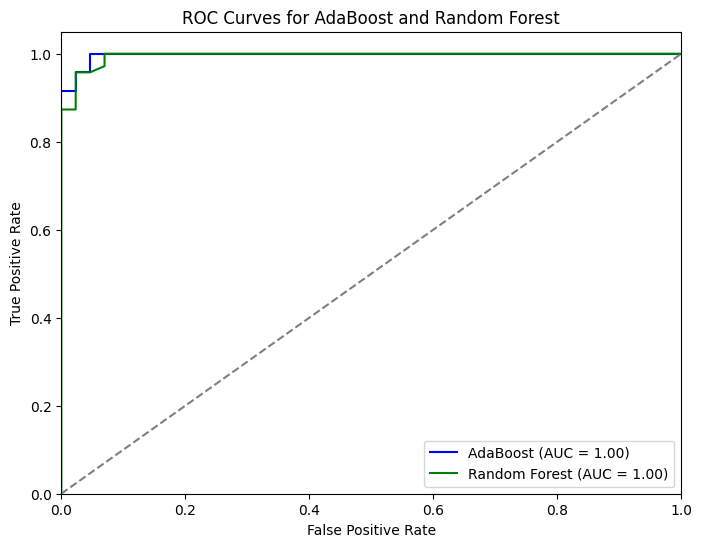

In [13]:
# Get the probabilities for the positive class (1)
y_score_adaboost = adaboost.predict_proba(X_test)[:, 1]
y_score_rf = random_forest.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for AdaBoost
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, y_score_adaboost)
roc_auc_adaboost = auc(fpr_adaboost, tpr_adaboost)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for AdaBoost and Random Forest')
plt.legend(loc="lower right")
plt.show()

---
# Sua vez: antes de iniciar os exercícios realize a mesma análise anterior na **base de dados** `iris`

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Carregando a base de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

In [16]:
# Binarizando os rótulos (necessário para a curva ROC multiclass)
y_bin = label_binarize(y, classes=[0, 1, 2])

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Treinando o modelo Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

In [18]:
# Treinando o modelo AdaBoost
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_y_pred)

/home/heart/.local/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [19]:
# Resultados de acurácia
print(f"Acurácia Random Forest: {rf_accuracy:.4f}")
print(f"Acurácia AdaBoost: {ada_accuracy:.4f}")

Acurácia Random Forest: 1.0000
Acurácia AdaBoost: 1.0000


# Exercícios

0. Complete o código para a base de dados iris
1. Interprete os Resultados
  - a) Comparação de Acurácia: Observe a acurácia de ambos os modelos. Qual modelo apresenta um melhor desempenho?
  - b) Curvas ROC: Analise as curvas ROC. Um modelo com uma curva mais próxima do canto superior esquerdo é melhor. Compare os valores de AUC (Área Sob a Curva) para cada modelo.

2. Com base na acurácia e na curva ROC, qual modelo você recomendaria para este conjunto de dados?

3. O que você acha que poderia influenciar as diferenças de desempenho entre AdaBoost e Random Forest?

4. Como o número de estimadores pode afetar o desempenho desses modelos?

5. Como o desbalanceamento das classes pode afetar o desempenho de cada modelo?

6. O AdaBoost foca em exemplos mal classificados ao longo do processo de treinamento. Em que tipo de problema isso poderia ser uma vantagem?

7. Se você estivesse lidando com um grande volume de dados, qual modelo você escolheria? Considere fatores como tempo de treinamento, capacidade de generalização e complexidade computacional.

# A) Comparação de Acurácia

In [20]:
print(f"Random Forest Acurácia: {rf_accuracy:.4f}")
print(f"AdaBoost Acurácia: {ada_accuracy:.4f}")


Random Forest Acurácia: 1.0000
AdaBoost Acurácia: 1.0000


# B) Curvas ROC

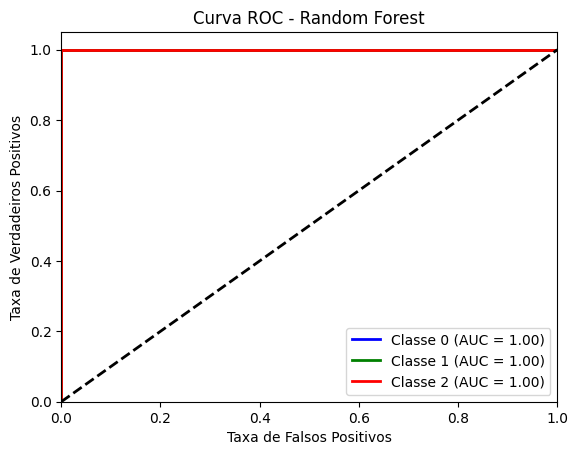

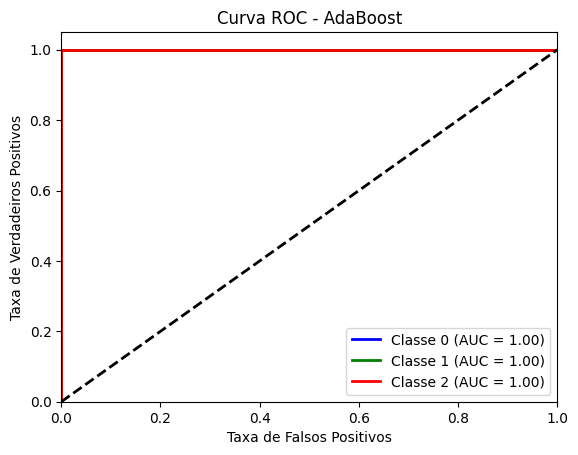

In [22]:
# Função para plotar ROC
def plot_roc_curve(y_test_bin, y_pred_proba, model_name):
    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    colors = ['blue', 'green', 'red']
    for i, color in zip(range(3), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Binarizando os rótulos de teste
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Calculando as probabilidades previstas para ROC
rf_y_pred_proba = rf_clf.predict_proba(X_test)
ada_y_pred_proba = ada_clf.predict_proba(X_test)

# Plotando a curva ROC para Random Forest
plot_roc_curve(y_test_bin, rf_y_pred_proba, "Random Forest")

# Plotando a curva ROC para AdaBoost
plot_roc_curve(y_test_bin, ada_y_pred_proba, "AdaBoost")


# EX 2:
Com base na acurácia e nas curvas ROC apresentadas para os modelos Random Forest e AdaBoost:

    Acurácia: Ambos os modelos apresentaram uma acurácia de 1.0 (ou seja, 100% de precisão), o que indica que ambos classificaram corretamente todos os exemplos nos dados de teste.

    Curva ROC: As curvas ROC de ambos os modelos também são perfeitas, com AUC (Área Sob a Curva) de 1.0 para todas as classes. Isso significa que ambos os modelos têm um desempenho ideal em termos de discriminação entre as classes, sem falsos positivos ou negativos.


## Recomendação:

Como ambos os modelos apresentam acurácia e AUC perfeitos, do ponto de vista dos resultados fornecidos pelos dados, qualquer um dos modelos poderia ser recomendado. No entanto, outros fatores podem ser considerados para escolher entre os dois:

    Random Forest pode ser preferido em situações onde a interpretação do modelo é importante, já que ele fornece a importância das features.
    AdaBoost pode ser preferido quando o foco é em exemplos mais difíceis de classificar, já que ele tende a se concentrar nos erros do treinamento.

Como os dados indicam um desempenho perfeito para ambos, sua escolha dependerá mais de fatores como tempo de treinamento, interpretabilidade ou robustez em diferentes conjuntos de dados.

# Ex 3:

    As principais diferenças de desempenho entre AdaBoost e Random Forest são influenciadas pelos seguintes fatores:
1. Natureza dos Modelos

    Random Forest:
        Consiste em vários árvores de decisão independentes, onde cada árvore é treinada em uma amostra aleatória (bootstrap) dos dados e as previsões são feitas com base na média (para regressão) ou no voto majoritário (para classificação).
        É robusto a outliers e ao overfitting, pois a variação entre as árvores reduz a chance de um ajuste exagerado a uma única característica dos dados.
        É menos afetado por dados ruidosos.

    AdaBoost:
        É um método de boosting que ajusta classificadores fracos de forma sequencial, corrigindo os erros do modelo anterior ao dar maior peso às observações mal classificadas.
        Pode ser mais suscetível a outliers e dados ruidosos, pois, como foca nos erros, outliers podem influenciar significativamente o treinamento.
        O desempenho do AdaBoost é fortemente influenciado por quão bem ele pode identificar e corrigir erros progressivamente, o que pode ser uma vantagem em conjuntos de dados difíceis.

2. Impacto dos Dados

    Ruído nos dados:
        O Random Forest tende a lidar melhor com ruído nos dados, já que combina diversas árvores independentes. Ele também é menos sensível a outliers, pois os outliers podem não ser amostrados em todas as árvores, o que limita sua influência.
        AdaBoost, por outro lado, pode ter um desempenho reduzido em dados ruidosos ou com outliers, já que dá mais peso aos exemplos mal classificados. Isso pode levar ao overfitting em dados com muito ruído.

3. Complexidade do Modelo

    Random Forest:
        Com um grande número de árvores, pode se tornar mais lento em termos de tempo de inferência (previsão), mas o treinamento pode ser paralelizado, o que melhora sua eficiência em grandes conjuntos de dados.
        Pode lidar com conjuntos de dados grandes e complexos de maneira eficiente.

    AdaBoost:
        Normalmente, é mais rápido no processo de inferência (porque usa menos classificadores fracos). Porém, o treinamento pode ser mais lento porque os classificadores são ajustados sequencialmente, e cada etapa depende da anterior.
        Pode ter um desempenho excelente em conjuntos de dados menores, mas em conjuntos de dados muito grandes, pode sofrer com a escalabilidade.

4. Suscetibilidade ao Overfitting

    Random Forest:
        É menos propenso ao overfitting, devido ao uso de amostras aleatórias e ao fato de que combina múltiplas árvores para tomar uma decisão final, suavizando as previsões.
    AdaBoost:
        Pode ser mais suscetível ao overfitting se houver muito ruído nos dados, especialmente quando são usados muitos classificadores fracos.

5. Interpretação dos Resultados

    Random Forest oferece importância das features, o que permite uma melhor compreensão de quais variáveis têm mais impacto nas previsões.
    AdaBoost não é tão interpretável diretamente, embora forneça a sequência de ajustamentos feitos nos dados.

6. Distribuição de Classes

    AdaBoost pode ser mais influenciado por um desbalanceamento de classes, já que ele dá mais peso aos exemplos mal classificados e pode focar mais nas classes minoritárias se estas forem mal classificadas inicialmente.
    Random Forest tende a ser mais robusto ao desbalanceamento, já que as árvores independentes distribuem o impacto dos exemplos de forma mais uniforme.

Resumo:

    Random Forest: Melhor quando há dados ruidosos ou outliers e quando se deseja um modelo robusto e de fácil interpretação. Ele é mais resistente ao overfitting e tende a funcionar bem em dados grandes.
    AdaBoost: Pode ser mais eficaz em problemas onde existem erros difíceis de corrigir, ou quando se quer um modelo rápido para inferência e o conjunto de dados não é muito ruidoso ou complexo.

# Ex 04:

    Exercício 4: Como o número de estimadores afeta o desempenho?

O número de estimadores (árvores ou "modelos fracos") afeta tanto o Random Forest quanto o AdaBoost. Aumentar o número de estimadores geralmente melhora o desempenho, mas depois de um certo ponto, o ganho marginal diminui e o tempo de treinamento aumenta.

# EX 05:

    Exercício 5: Como o desbalanceamento das classes pode afetar o desempenho?

Tanto o Random Forest quanto o AdaBoost podem ser afetados por classes desbalanceadas:

    Random Forest pode ser menos afetado devido à sua capacidade de construir várias árvores independentes.
    AdaBoost, por focar em erros, pode ser mais influenciado por classes desbalanceadas, pois exemplos de classes menores são mais difíceis de acertar, levando o modelo a priorizar esses exemplos.

# Ex 06:

    Exercício 6: Em que tipo de problema o AdaBoost seria vantajoso?

O AdaBoost é vantajoso em problemas com:

    Ruído moderado.
    Classes difíceis de separar.
    Outliers leves, pois o foco em exemplos mal classificados pode ajustar melhor o modelo.

# Ex 07:

    Exercício 7: Para grandes volumes de dados, qual modelo escolher?

Para grandes volumes de dados:

    Random Forest pode ser mais eficiente, pois pode ser paralelizado e tende a ter um treinamento mais rápido.
    AdaBoost pode ter maior custo computacional, pois a cada iteração, ajusta o peso dos exemplos com base nos erros anteriores, o que pode aumentar o tempo de treinamento.